# Data Preparation & Machine Learning CA2
## Early Data Analysis
### Import data analysis libraries

NumPy: This is a short form of numerical Python. It is the most powerful
scientific library available in Python for handling multidimensional arrays,
matrices, and methods in order to compute mathematics efficiently.

SciPy: This is also a powerful scientific computing library for performing
scientific, mathematical, and engineering operations.

Pandas: This is a data exploration and manipulation library that offers tabular
data structures such as DataFrames and various methods for data analysis and
manipulation.

Scikit-learn: This stands for "Scientific Toolkit for Machine learning". It is a
machine learning library that offers a variety of supervised and unsupervised
algorithms, such as regression, classification, dimensionality reduction, cluster
analysis, and anomaly detection

Matplotlib: This is a core data visualization library and is the base library for all
other visualization libraries in Python. It offers 2D and 3D plots, graphs, charts,
and figures for data exploration. It runs on top of NumPy and SciPy.

Seaborn: This is based on Matplotlib and offers easy to draw, high-level,
interactive, and more organized plots.

Plotly: Plotly is a data visualization library. It offers high quality and interactive
graphs, such as scatter charts, line charts, bar charts, histograms, boxplots,
heatmaps, and subplots
(Avinash Navlani, Fandango and Idris, 2021)

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('NHANES_age_prediction.csv')

In [3]:
# Visualizing the head of the dataset
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [4]:
# Dataset information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [5]:
#Statistics Summary 
df.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [6]:
df.median()

SEQN        78749.00
RIDAGEYR       41.00
RIAGENDR        2.00
PAQ605          2.00
BMXBMI         26.80
LBXGLU         97.00
DIQ010          2.00
LBXGLT        105.00
LBXIN           9.04
dtype: float64

In [7]:
df['SEQN'].unique()

array([73564., 73568., 73576., ..., 83713., 83718., 83727.])

In [8]:
df['age_group'].unique()

array(['Adult', 'Senior'], dtype=object)

In [9]:
# Drop ID colum 
data = df.drop(columns=('SEQN'))
data.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [10]:
data =  data.astype({'RIDAGEYR': 'int','RIAGENDR': 'int','PAQ605': 'int','DIQ010': 'int'})
data.head()

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,Adult,61,2,2,35.7,110.0,2,150.0,14.91
1,Adult,26,2,2,20.3,89.0,2,80.0,3.85
2,Adult,16,1,2,23.2,89.0,2,68.0,6.14
3,Adult,32,1,2,28.9,104.0,2,84.0,16.15
4,Adult,38,2,1,35.9,103.0,2,81.0,10.92


In [11]:
# Rename columns' names

data.rename(columns={'RIDAGEYR': 'age', 'RIAGENDR': 'gender', 'PAQ605': 'fitness', 'BMXBMI': 'BMI','LBXGLU': 'glucose', 'DIQ010': 'diabetic', 'LBXGLT': 'oral', 'LBXIN': 'insulin'}, inplace=True)

In [12]:
#Checking missing values 
data.isnull().sum()

age_group    0
age          0
gender       0
fitness      0
BMI          0
glucose      0
diabetic     0
oral         0
insulin      0
dtype: int64

In [13]:
# Checking for duplicated values 
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2273    False
2274    False
2275    False
2276    False
2277    False
Length: 2278, dtype: bool

<Axes: >

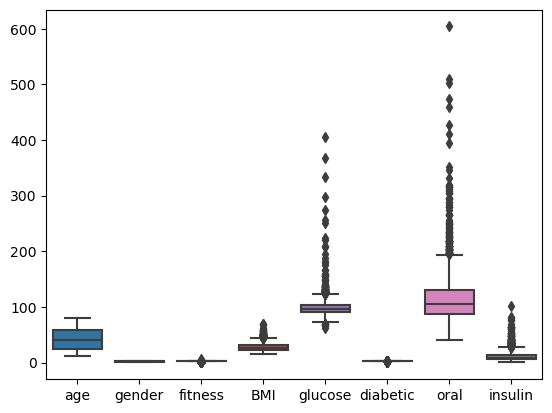

In [14]:
#Plotting outliers 
sns.boxplot(data=data)

## Transforming

In [15]:
# Replace categorical Senior, Adult age group for numerical 0 and 1 
data['age_group'].replace('Senior', 0, inplace = True)
data['age_group'].replace('Adult', 1, inplace = True)


In [16]:
!pip install sklearn --user 

### Label Encoding 

In [17]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

#data.gender = le.fit_transform(data.gender)
#data.fitness = le.fit_transform(data.fitness)
##data.diabetic = le.fit_transform(data.diabetic)

In [18]:
data.head(10)

,age_group,age,gender,fitness,BMI,glucose,diabetic,oral,insulin
0,1,61,2,2,35.7,110.0,2,150.0,14.91
1,1,26,2,2,20.3,89.0,2,80.0,3.85
2,1,16,1,2,23.2,89.0,2,68.0,6.14
3,1,32,1,2,28.9,104.0,2,84.0,16.15
4,1,38,2,1,35.9,103.0,2,81.0,10.92
5,1,50,1,2,23.6,110.0,2,100.0,6.08
6,1,14,1,2,38.7,94.0,2,202.0,21.11
7,1,57,2,2,38.3,107.0,2,164.0,20.93
8,0,75,1,2,38.9,89.0,2,113.0,17.47
9,1,43,1,1,28.9,90.0,2,95.0,3.24


<Axes: xlabel='diabetic', ylabel='insulin'>

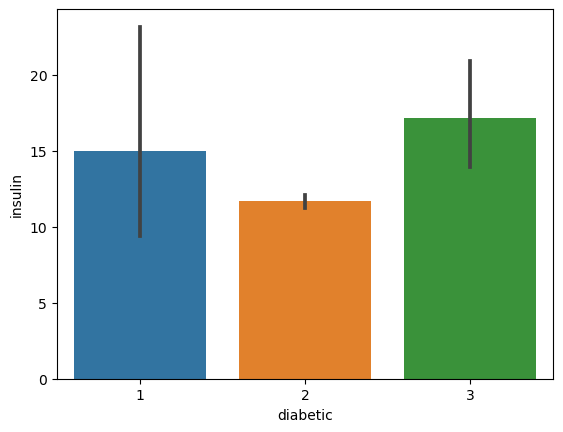

In [19]:
sns.barplot(x="diabetic", y="insulin", data=data)

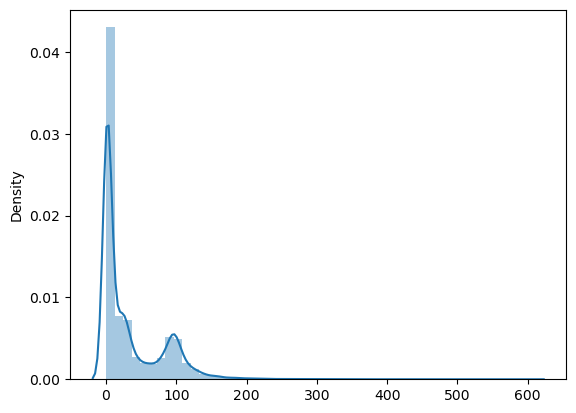

In [20]:
# Create a distribution plot (also known as Histogram)
sns.distplot(data)

# Show figure
plt.show()



In [21]:
#skewness of communication_skill_score column

data.skew()


age_group   -1.858216
age          0.237167
gender      -0.045696
fitness     -0.543589
BMI          1.333223
glucose      7.190189
diabetic     2.282147
oral         2.874792
insulin      2.782750
dtype: float64

In [22]:
(data < 0).values.any()

False

In [23]:
df_z = data.groupby(['BMI','diabetic']).mean()['insulin']

df_z= pd.DataFrame(df_z, columns=['insulin'])
                                    
df_z = df_z.reset_index()

df_z.head()

,BMI,diabetic,insulin
0,14.5,2,10.86
1,14.6,2,7.10
2,15.3,2,15.82
3,15.4,2,4.07
4,15.7,2,4.39


<Axes: xlabel='BMI', ylabel='insulin'>

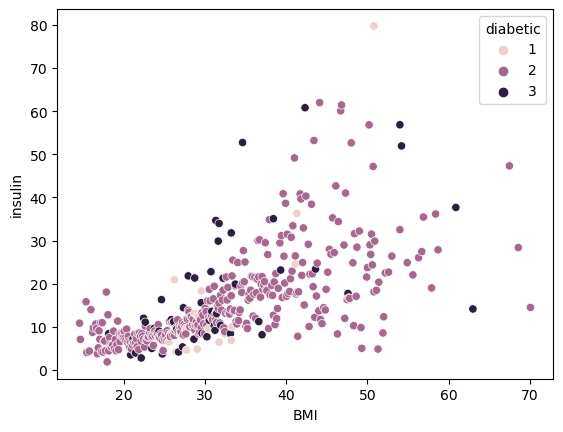

In [24]:
sns.scatterplot(x="BMI", y="insulin", hue='diabetic', data=df_z)

<Axes: xlabel='BMI', ylabel='glucose'>

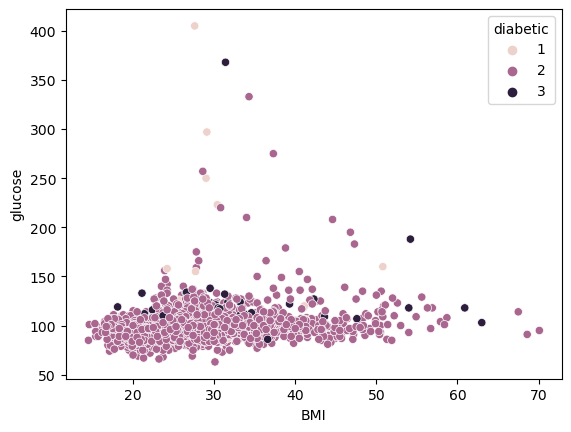

In [25]:
sns.scatterplot(x="BMI", y="glucose", hue='diabetic', data=data)

In [26]:
df_a = data.groupby(['gender','diabetic']).mean()['insulin']

df_a= pd.DataFrame(df_a, columns=['insulin'])
                                    
df_a = df_a.reset_index()

df_a.head()


,gender,diabetic,insulin
0,1,1,12.815000
1,1,2,11.784384
2,1,3,18.820606
3,2,1,16.296154
4,2,2,11.550985


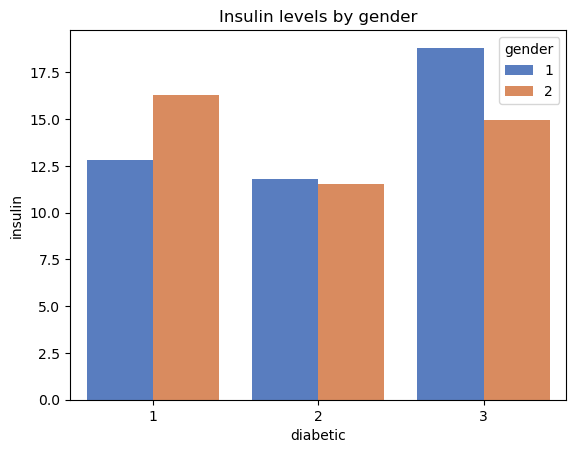

In [27]:

# customize the bar plot

sns.barplot(x="diabetic", y="insulin", hue="gender", ci=None, palette="muted", data=df_a)




# add labels and title

plt.xlabel("diabetic")

plt.ylabel("insulin")

plt.title("Insulin levels by gender")




# display the plot

plt.show()

In [28]:
data['diabetic'].unique()

array([2, 1, 3])

In [29]:
df_b = data.groupby(['diabetic']).mean()['insulin']

nova= pd.DataFrame(df_b, columns=['insulin'])
                                    
nova = nova.reset_index()

nova.head()

,diabetic,insulin
0,1,14.970000
1,2,11.664766
2,3,17.146034


<Axes: xlabel='diabetic', ylabel='insulin'>

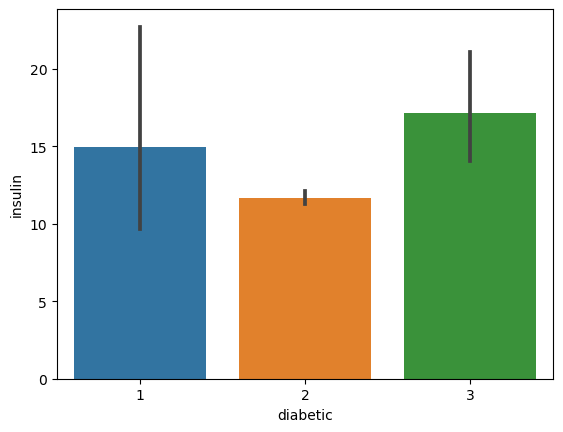

In [30]:
sns.barplot(x="diabetic", y="insulin", data=data)

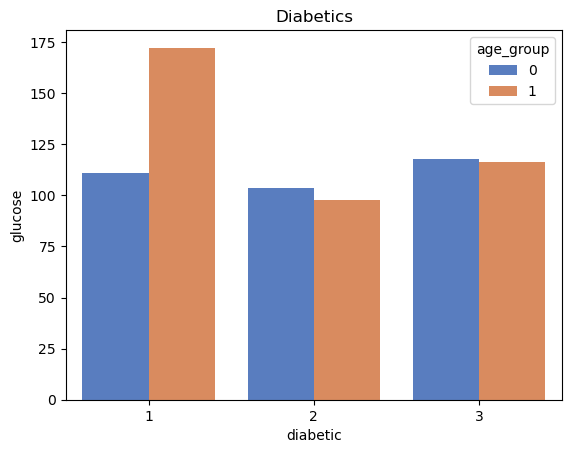

In [31]:

# customize the bar plot

sns.barplot(x="diabetic", y="glucose", hue="age_group", ci=None, palette="muted", data=data)




# add labels and title

plt.xlabel("diabetic")

plt.ylabel("glucose")

plt.title("Diabetics")




# display the plot

plt.show()

## Identifying the inpedendable and dependable (target) variables:

Dependable variable is the variable we would like to predict or explain, in this case is the days of the week cyclists are cycling, weekend or weekday. 

Indenpendable variable is the variables that will be used to explain the target variable, in this case our new features after implementing dimensionality reduction using PCA (Principal Component Analysis).  

In [32]:
# Capital X because there are more than one feature 
  # y - lower case = because it's only one feature. 
    
X = data.drop(columns=['diabetic'])
y = data['diabetic']

X.shape, y.shape

((2278, 8), (2278,))

## Implementing LDA 

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
easy_lda = lda.fit_transform(X, y)

In [34]:
easy_lda

array([[ 0.8650292 ,  0.48934944],
       [-0.77575209, -1.33482807],
       [-1.18531581, -0.69245776],
       ...,
       [ 0.01417613,  0.75067176],
       [-0.27113503,  0.15090802],
       [-0.05823786, -0.96581723]])

In [35]:
lda.explained_variance_ratio_

array([0.93215015, 0.06784985])

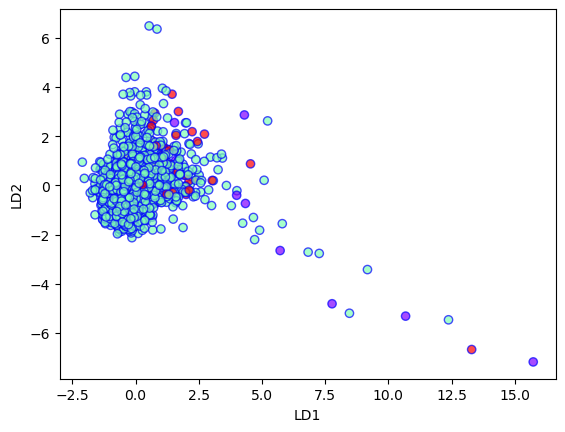

In [36]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    easy_lda[:,0],
    easy_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b')

## Implementing PCA

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [38]:
pca.explained_variance_ratio_

array([0.78741138, 0.11727831])

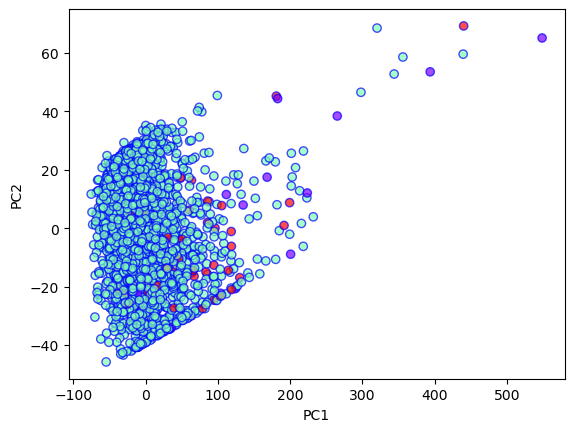

In [39]:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b')

# Aplying Machine Learning
Splitting the data

In Supervised Machine Learning the goal is to build a model with the training data, that is able to do the predctions of new, unseen data that has the same characteristic of the training data that has been used before. It is important that the model can make good generalization from the training set to the test set, which means that the model can make accurate predictions of new data. The evaluation of the test set will tell if a model has been performed well or not.

In order to set up our training and test. The employment dataset which contains 886303 observations, will be trained on ML model on 80% of the data for training and the remaining 20% of the data will be used for testing.

There is also the terms called Overfitting which means that the ML model has learned/memorized the training data very well but fails to perform on the testing data, also Underfitting when there isn't enough variety of data and for that reason the model perform poorly on the training set.

# Supervised, KNN model 

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state=1)

In [66]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 2)

# Train the model using the training sets
kNN.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = kNN.predict(X_test)

## Model Evaluation

In [68]:
# Import metrics module for performance evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Calculate model accuracy
print("Accuracy:",accuracy_score(y_test, y_pred))
# Calculate model precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))
# Calculate model recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))
# Calculate model f1 score
print("F1-Score:",f1_score(y_test, y_pred, average='micro'))


Accuracy: 0.9415204678362573
Precision: 0.9415204678362573
Recall: 0.9415204678362573
F1-Score: 0.9415204678362573


In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 

k_values = [i for i in range (2,50)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X_pca)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_pca, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

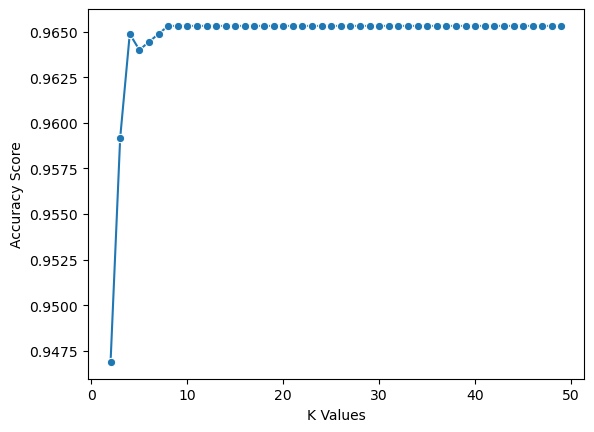

In [72]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

<Axes: >

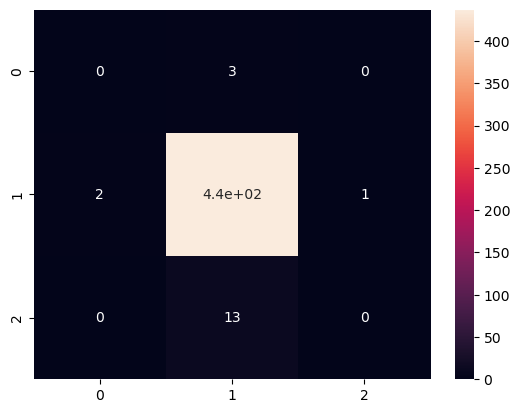

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Call a method predict by using an object classifier 'cls_svm'
y_predict = kNN.predict(X_test)

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# Decision Three 

In [45]:
from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=1)

In [79]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 10, random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

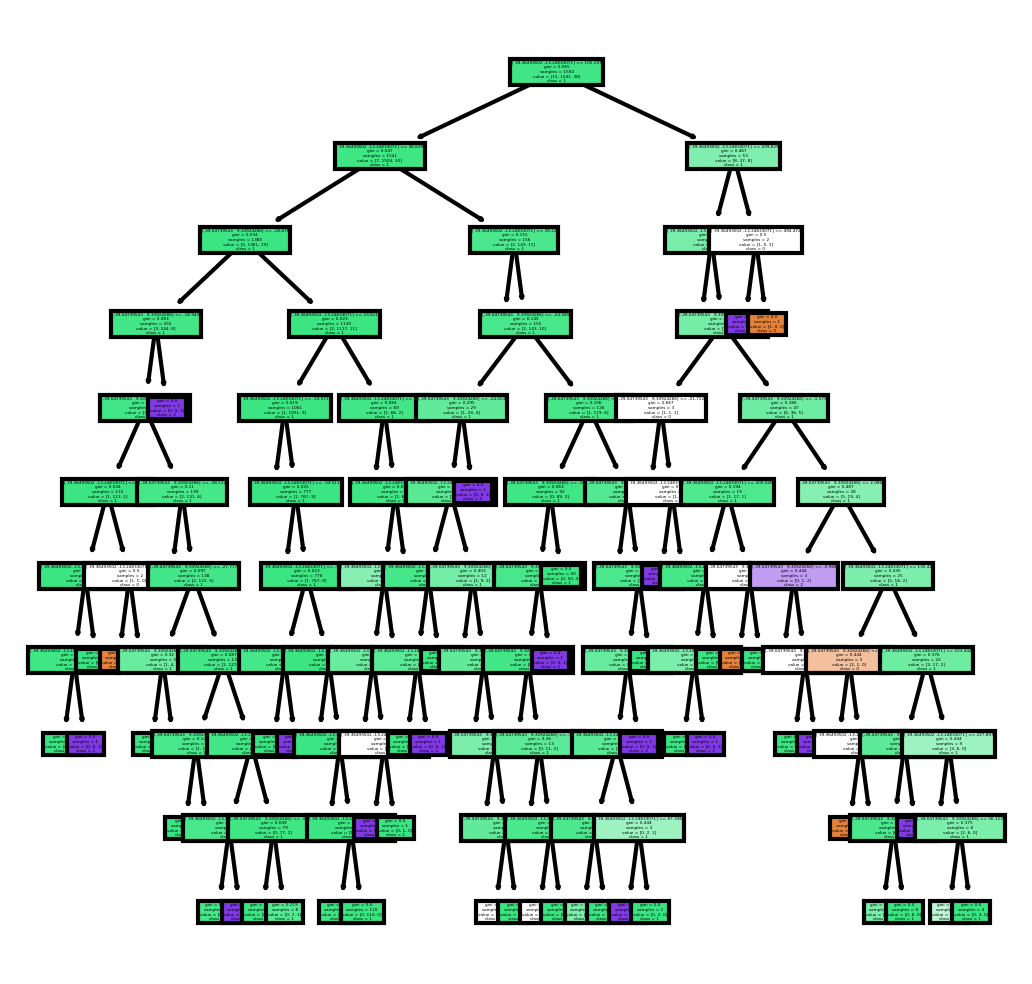

In [80]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# column names for dataset
fn=X_pca
# classes of dataset
cn=['0','1', '2']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf,
           feature_names = fn, 
           class_names = cn,
           filled = True);


## Model Evalutation

In [81]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.9371345029239766
Accuracy: 0.94


In [49]:
# Calculate model accuracy
print("Accuracy:",accuracy_score(y_test, y_pred))
# Calculate model precision
print("Precision:",precision_score(y_test, y_pred, average='micro'))
# Calculate model recall
print("Recall:",recall_score(y_test, y_pred, average='micro'))
# Calculate model f1 score
print("F1-Score:",f1_score(y_test, y_pred, average='micro'))


Accuracy: 0.9614035087719298
Precision: 0.9614035087719298
Recall: 0.9614035087719298
F1-Score: 0.9614035087719298


In [75]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.9429824561403509
Accuracy: 0.94


# Unsupervised ML, Clustering - K-Means 

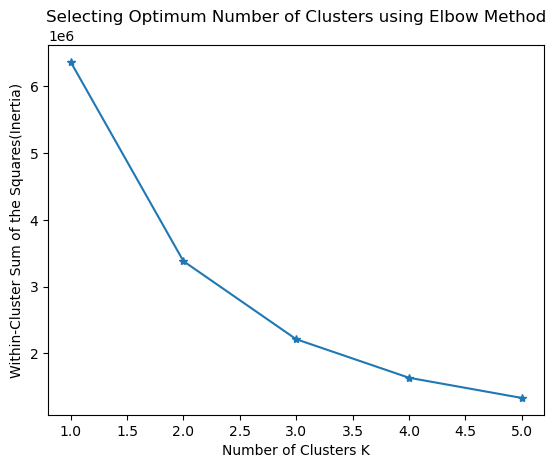

In [50]:
from sklearn.cluster import KMeans 
wcss_list = []


# Run a loop for different value of number of cluster
for i in range(1, 6):
    
 # Create and fit the KMeans model
    kmeans_model = KMeans(n_clusters = i, random_state = 123)
    kmeans_model.fit(X_pca)

 # Add the WCSS or inertia of the clusters to the score_list
    wcss_list.append(kmeans_model.inertia_)

# Plot the inertia(WCSS) and number of clusters
plt.plot(range(1, 6), wcss_list, marker='*')

# set title of the plot
plt.title('Selecting Optimum Number of Clusters using Elbow Method')

# Set x-axis label
plt.xlabel('Number of Clusters K')

# Set y-axis label
plt.ylabel('Within-Cluster Sum of the Squares(Inertia)')

# Display plot
plt.show()


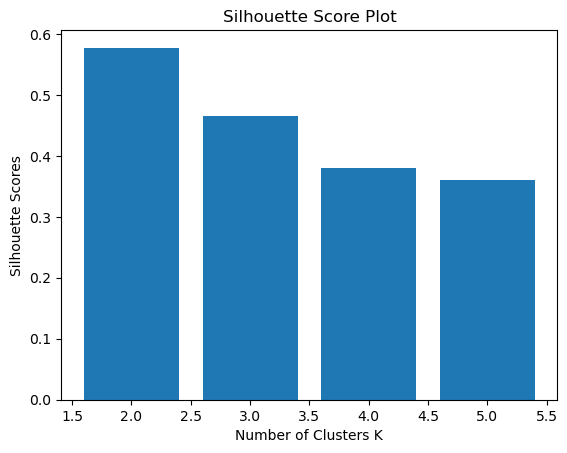

In [51]:
from sklearn.metrics import silhouette_score
score_list = []

# Run a loop for different value of number of cluster
for i in range(2, 6):
    
 # Create and fit the KMeans model
     kmeans_model = KMeans(n_clusters = i, random_state = 123)
     kmeans_model.fit(X_pca)
 # Make predictions
     pred=kmeans_model.predict(X_pca)
 # Calculate the Silhouette Score
     score = silhouette_score (X_pca, pred, metric='euclidean')
 # Add the Silhouette score of the clusters to the score_list
     score_list.append(score)
    
# Plot the Silhouette score and number of cluster
plt.bar(range(2, 6), score_list)

# Set title of the plot
plt.title('Silhouette Score Plot')

# Set x-axis label
plt.xlabel('Number of Clusters K')

# Set y-axis label
plt.ylabel('Silhouette Scores')

# Display plot
plt.show()



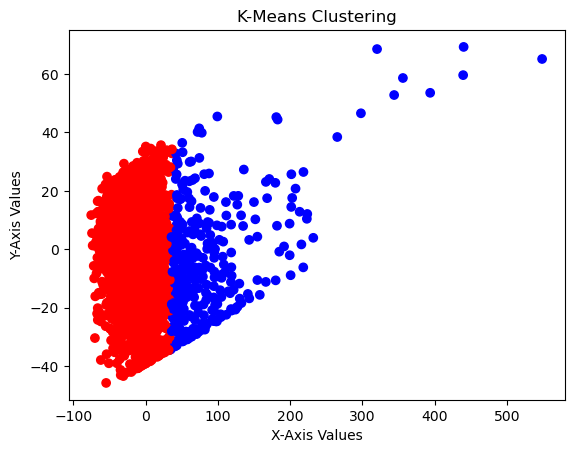

In [52]:


#Define number of clusters
num_clusters = 2

# Create and fit the KMeans model
km = KMeans(n_clusters=num_clusters)
km.fit(X_pca)

# Predict the target variable
pred=km.predict(X_pca)

# Plot the Clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pred, marker="o", cmap="bwr_r")

# Set title of the plot
plt.title('K-Means Clustering')

#Set x-axis label
plt.xlabel('X-Axis Values')

# Set y-axis label
plt.ylabel('Y-Axis Values')

# Display the plot
plt.show()


In [53]:
# Import metrics module for performance evaluation
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import fowlkes_mallows_score

# Specify the number of clusters
num_clusters = 2

# Create and fit the KMeans model
km = KMeans(n_clusters=num_clusters)
km.fit(X_train)

# Predict the target variable
predictions = km.predict(X_test)

# Calculate internal performance evaluation measures
print("Davies-Bouldin Index:", davies_bouldin_score(X_test,
predictions))
print("Silhouette Coefficient:", silhouette_score(X_test,
predictions))

# Calculate External performance evaluation measures
print("Adjusted Rand Score:", adjusted_rand_score(y_test,
predictions))
print("Jaccard Score:", jaccard_score (y_test, predictions, average='micro'))
print("F-Measure(F1-Score):", f1_score(y_test, predictions, average='micro'))
print("Fowlkes Mallows Score:", fowlkes_mallows_score(y_test,
predictions))

Davies-Bouldin Index: 0.6197608078829999
Silhouette Coefficient: 0.5742143083106322
Adjusted Rand Score: 0.18632855645492616
Jaccard Score: 0.002638522427440633
F-Measure(F1-Score): 0.005263157894736842
Fowlkes Mallows Score: 0.8953339654574395
